# MSci Project Working Notes
### Sprinklings with spacelike hypersurface

In [7]:
#Import libraries
import numpy as np
import random 
import matplotlib.pyplot as plt
from itertools import permutations, combinations, product
from mpl_toolkits import mplot3d

## Sprinkling
 - Choose finite region of spacetime in which to sprinkle elements to be $(u,v) = [[0,1],[0,1]]$
 - In this way, across many iterations, we are sprinkling at constant density $\rho$:
 
\begin{align}
\rho = \frac{<N>}{\text{2-volume}}
\end{align}


Number of causal set elements to be sprinkled 56


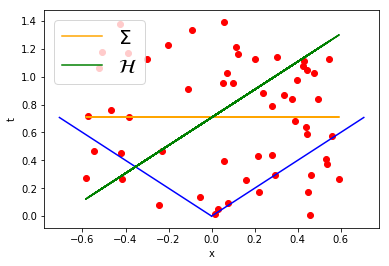

In [2]:
#Choose finite region of spacetime in which to sprinkle to be (x, t) = [[-1,1],[-1,1]]
N_mean = 50
N = int(np.random.normal(N_mean,0.1*N_mean))
print "Number of causal set elements to be sprinkled", N
xlist = [random.uniform(-1/np.sqrt(2),1/np.sqrt(2)) for i in range(N)]
tlist = [random.uniform(0,np.sqrt(2)) for i in range(N)]

positivex = np.linspace(0,1/np.sqrt(2),10)
negativex = np.linspace(-1/np.sqrt(2),0,10)
plt.figure()
[plt.scatter(xlist[i],tlist[i],color='r') for i in range(N)]
plt.plot(positivex,positivex,color='b')
plt.plot(negativex,[-1*i for i in negativex],color='b')
plt.plot(xlist,[1/np.sqrt(2) for i in range(len(xlist))],label=r'$\Sigma$',color='orange')
plt.plot(xlist,[i+1/np.sqrt(2) for i in xlist],label=r'$\mathcal{H}$',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.legend(fontsize=20)
plt.show()

In [3]:
elements = zip(xlist,tlist)

\begin{align}
u = \frac{1}{\sqrt{2}} (x + t)
\end{align}

\begin{align}
v = \frac{1}{\sqrt{2}} (t - x)
\end{align}


In [4]:
def nullcoords(element):
    return (1/np.sqrt(2))*(element[0]+element[1]),(1/np.sqrt(2))*(element[1]-element[0])

In [5]:
elements_uv = [nullcoords(i) for i in elements]
#Elements has the form:
# [    ( (x,t), (u,v), ELEMENT NUMBER ) ,  ...] for each element
elements = [(elements[i],elements_uv[i],i) for i in range(len(elements))]

def t(element):
    return element[0][1]
def x(element):
    return element[0][0]
def u(element):
    return element[1][0]
def v(element):
    return element[1][1]
def number(element):
    return element[2]

23


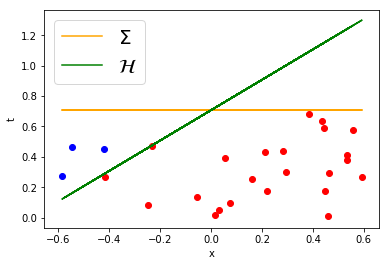

In [6]:
#Find elements 'x' in required region

plt.figure()
count = 0
for element in elements:
    if t(element) < 1/np.sqrt(2) and v(element) < 0.5:
            count +=1
            plt.scatter(x(element),t(element),color='r')
for element in elements:
    if t(element) <1/np.sqrt(2) and v(element)>0.5:
        plt.scatter(x(element),t(element),color='b')
print count
plt.plot(xlist,[1/np.sqrt(2) for i in range(len(xlist))],label=r'$\Sigma$',color='orange')
plt.plot(xlist,[i+1/np.sqrt(2) for i in xlist],label=r'$\mathcal{H}$',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.legend(fontsize=20)
plt.show()

In [7]:
# Find other elements above x, check if there is only one, check if its required region
count =0
for element in elements:
    
    #If x in the required region
    if t(element) < 1/np.sqrt(2) and v(element) <0.5:
        abovex = [] #list of elements above x, but below sigma
    
        #Search for element y
        for element2 in elements:
            #If y above x and they aren't the same element
            if number(element) != number(element2) and u(element) < u(element2) and v(element) < v(element2):
                # If y below sigma
                if t(element2) < 1/np.sqrt(2):
                    abovex.append(element2)
        # If there's only one element above x, and that element is above the Horizon:
        if len(abovex) == 1 and v(abovex[0]) >0.5:
            count +=1
print count

0


# Part (i)
- $ x \in J^{-}(\Sigma) \cap J^{-}(\mathcal{H})$
- $ y \in J^{-}(\Sigma) \cap J^{+}(\mathcal{H})$
- $ x \prec y$ is a link
- $x$ is maximal-but-one in $J^{-}(\Sigma)$

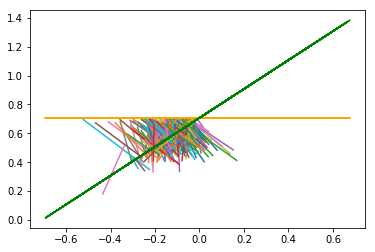

Mean Number of Links:  0.313 with variance:  0.365031 at a sprinkling density of 100 with number of repetitions:  1000


In [16]:
#Main Algo
N_repetitions = 1000
N_mean = 100

plt.figure()
count = []
for i in range(N_repetitions):
    counter = 0
    N = int(np.random.normal(N_mean,0.1*N_mean))
    xlist = [random.uniform(-1/np.sqrt(2),1/np.sqrt(2)) for i in range(N)]
    tlist = [random.uniform(0,np.sqrt(2)) for i in range(N)]

    elements = zip(xlist,tlist)
    elements_uv = [nullcoords(i) for i in elements]
    elements = [(elements[i],elements_uv[i],i) for i in range(len(elements))]

    # Find other elements above x, check if there is only one, check if its required region
    for element in elements:

        #If x in the required region
        if t(element) < 1/np.sqrt(2) and v(element) <0.5:
            abovex = [] #list of elements above x, but below sigma

            #Search for element y
            for element2 in elements:
                #If y above x and they aren't the same element
                if number(element) != number(element2) and u(element) < u(element2) and v(element) < v(element2):
                    # If y below sigma
                    if t(element2) < 1/np.sqrt(2):
                        abovex.append(element2)
            # If there's only one element above x, and that element is above the Horizon:
            if len(abovex) == 1 and v(abovex[0]) >0.5:
                counter +=1
                plt.plot([x(element),x(abovex[0])],[t(element),t(abovex[0])])
    count.append(counter)

plt.plot(xlist,[1/np.sqrt(2) for i in range(len(xlist))],label=r'$\Sigma$',color='orange')
plt.plot(xlist,[i+1/np.sqrt(2) for i in xlist],label=r'$\mathcal{H}$',color='green')  
plt.show()

print "Mean Number of Links: ", np.mean(count), "with variance: ", np.var(count), "at a sprinkling density of", N_mean, "with number of repetitions: ", N_repetitions

# Try to find behaviour as sprinkling gets denser

Mean Number of Links:  0.0 with variance:  0.0 at a sprinkling density of 1.0 with number of repetitions:  100
Mean Number of Links:  0.04 with variance:  0.0584 at a sprinkling density of 3.53846153846 with number of repetitions:  100
Mean Number of Links:  0.13 with variance:  0.1531 at a sprinkling density of 6.07692307692 with number of repetitions:  100
Mean Number of Links:  0.16 with variance:  0.1544 at a sprinkling density of 8.61538461538 with number of repetitions:  100
Mean Number of Links:  0.18 with variance:  0.1676 at a sprinkling density of 11.1538461538 with number of repetitions:  100
Mean Number of Links:  0.32 with variance:  0.2976 at a sprinkling density of 13.6923076923 with number of repetitions:  100
Mean Number of Links:  0.28 with variance:  0.3416 at a sprinkling density of 16.2307692308 with number of repetitions:  100
Mean Number of Links:  0.38 with variance:  0.3356 at a sprinkling density of 18.7692307692 with number of repetitions:  100
Mean Number of

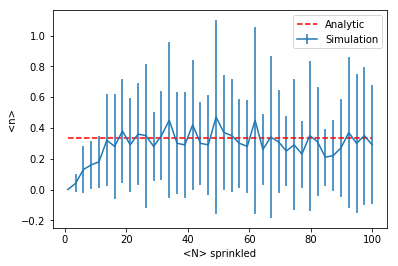

In [14]:
#Main Algo

N_mean_list = np.linspace(1,100,40)
values = []
for val in N_mean_list:
    N_mean = val

    N_repetitions = 100


    count = []
    for i in range(N_repetitions):
        counter = 0
        #print i, "out of", N_repetitions
        N = int(np.random.normal(N_mean,0.1*N_mean))
        xlist = [random.uniform(-1/np.sqrt(2),1/np.sqrt(2)) for i in range(N)]
        tlist = [random.uniform(0,np.sqrt(2)) for i in range(N)]

        elements = zip(xlist,tlist)
        elements_uv = [nullcoords(i) for i in elements]
        elements = [(elements[i],elements_uv[i],i) for i in range(len(elements))]

        # Find other elements above x, check if there is only one, check if its required region
        for element in elements:

            #If x in the required region
            if t(element) < 1/np.sqrt(2) and v(element) <0.5:
                abovex = [] #list of elements above x, but below sigma

                #Search for element y
                for element2 in elements:
                    #If y above x and they aren't the same element
                    if number(element) != number(element2) and u(element) < u(element2) and v(element) < v(element2):
                        # If y below sigma
                        if t(element2) < 1/np.sqrt(2):
                            abovex.append(element2)
                # If there's only one element above x, and that element is above the Horizon:
                if len(abovex) == 1 and v(abovex[0]) >0.5:
                    counter +=1
        count.append(counter)

    print "Mean Number of Links: ", np.mean(count), "with variance: ", np.var(count), "at a sprinkling density of", N_mean, "with number of repetitions: ", N_repetitions
    values.append((np.mean(count),np.var(count)))
    
plt.figure()
plt.errorbar(N_mean_list,[i[0] for i in values],yerr=[i[1] for i in values],label='Simulation')
plt.plot(N_mean_list,[1./3. for i in range(len(N_mean_list))],'--',color='r',label='Analytic')
plt.xlabel('<N> sprinkled')
plt.ylabel('<n>')
plt.legend()
plt.savefig('Part(i)_asymptotic_behaviour')
plt.show()

# Part (ii) and (i.5)
- $ x \in J^{-}(\Sigma) \cap J^{-}(\mathcal{H})$
- $ y \in J^{-}(\Sigma) \cap J^{+}(\mathcal{H})$
- $ x \prec y$ is a link
- $x$ is 'next-to-maximal' in $J^{-}(\Sigma)$

In [ ]:
def spacelike_check(list_elements): #check that all elements in list are spacelike to eachother
    for pair in combinations(list_elements,r=2):
    #Spacelike if change in x coord is greater than change in t coordinate
        element1, element2 = pair
        if np.abs(x(element2)-x(element1)) < np.abs(t(element2)-t(element)):
            return False
    return True
    
    
def position_count(list_elements): #for part ii, we count only one for each of these occurences
    count = 0
    for element in list_elements:
        if v(element) >0.5:
            count +=1
    return count

    
def position_check(list_elements): #check at least one of the elements above x is in the correct position to be y
    # i.e. only count '1' regardless of number that could be y
    for element in list_elements:
        if v(element) >0.5:
            return True
        

#Main Algo
N_repetitions = 1000
N_mean = 100

count_ii = []
count_ipoint5 = []
for i in range(N_repetitions):
    counter_ii = 0
    counter_i5 = 0
    
    N = int(np.random.normal(N_mean,0.1*N_mean))
    xlist = [random.uniform(-1/np.sqrt(2),1/np.sqrt(2)) for i in range(N)]
    tlist = [random.uniform(0,np.sqrt(2)) for i in range(N)]

    elements = zip(xlist,tlist)
    elements_uv = [nullcoords(i) for i in elements]
    elements = [(elements[i],elements_uv[i],i) for i in range(len(elements))]

    # Find other elements above x, check if there is only one, check if its required region
    for element in elements:

        #If x in the required region
        if t(element) < 1/np.sqrt(2) and v(element) <0.5:
            abovex = [] #list of elements above x, but below sigma

            #Search for element y
            for element2 in elements:
                #If y above x and they aren't the same element
                if number(element) != number(element2) and u(element) < u(element2) and v(element) < v(element2):
                    # If y below sigma
                    if t(element2) < 1/np.sqrt(2):
                        abovex.append(element2)
                        
                        
            # If all elements above x are spacelike to eachother
            if spacelike_check(abovex):
                if position_check(abovex):
                    counter_i5 +=1
                    counter_ii += position_count(abovex)
        
    count_ii.append(counter_ii)
    count_ipoint5.append(counter_i5)
 
  

print "Part ii, ", np.mean(count_ii),np.var(count_ii)
print "Part i.5, ", np.mean(count_ipoint5), np.var(count_ipoint5)

# Check Behaviour as sprinkling gets denser

In [ ]:
def spacelike_check(list_elements): #check that all elements in list are spacelike to eachother
    for pair in combinations(list_elements,r=2):
    #Spacelike if change in x coord is greater than change in t coordinate
        element1, element2 = pair
        if np.abs(x(element2)-x(element1)) < np.abs(t(element2)-t(element)):
            return False
    return True
    
    
def position_count(list_elements): #for part ii, we count only one for each of these occurences
    count = 0
    for element in list_elements:
        if v(element) >0.5:
            count +=1
    return count

    
def position_check(list_elements): #check at least one of the elements above x is in the correct position to be y
    # i.e. only count '1' regardless of number that could be y
    for element in list_elements:
        if v(element) >0.5:
            return True
        

        
N_mean_list = [10,50,100,500,1000]
means_ii = []
variances_ii = []
means_i5 = []
variances_i5 = []
for val in N_mean_list:
    N_mean = val
    #Main Algo
    N_repetitions = 1000

    count_ii = []
    count_ipoint5 = []
    for i in range(N_repetitions):
        counter_ii = 0
        counter_ipoint5=0

        N = int(np.random.normal(N_mean,0.1*N_mean))
        xlist = [random.uniform(-1/np.sqrt(2),1/np.sqrt(2)) for i in range(N)]
        tlist = [random.uniform(0,np.sqrt(2)) for i in range(N)]

        elements = zip(xlist,tlist)
        elements_uv = [nullcoords(i) for i in elements]
        elements = [(elements[i],elements_uv[i],i) for i in range(len(elements))]

        # Find other elements above x, check if there is only one, check if its required region
        for element in elements:

            #If x in the required region
            if t(element) < 1/np.sqrt(2) and v(element) <0.5:
                abovex = [] #list of elements above x, but below sigma

                #Search for element y
                for element2 in elements:
                    #If y above x and they aren't the same element
                    if number(element) != number(element2) and u(element) < u(element2) and v(element) < v(element2):
                        # If y below sigma
                        if t(element2) < 1/np.sqrt(2):
                            abovex.append(element2)


                # If all elements above x are spacelike to eachother
                if spacelike_check(abovex):
                    if position_check(abovex):
                        counter_ipoint5 +=1
                        counter_ii += position_count(abovex)
        count_ii.append(counter_ii)
        count_ipoint5.append(counter_ipoint5)
        
    

    print "Part ii, ", np.mean(count_ii), np.var(count_ii)
    print "Part i.5, ", np.mean(count_ipoint5),np.var(count_ipoint5)
    means_ii.append(np.mean(count_ii))
    variances_ii.append(np.var(count_ii))
    means_i5.append(np.mean(count_ipoint5))
    variances_i5.append(np.var(count_ipoint5))

    
plt.figure()
plt.errorbar(N_mean_list,means_i5,yerr= variances_i5)
plt.xlabel('<N> sprinkled')
plt.ylabel('<n>')
plt.title("Part i.5")
plt.show()

plt.figure()
plt.title("Part ii")
plt.errorbar(N_mean_list, means_ii,yerr=variances_ii)
plt.xlabel('<N> sprinkled')
plt.ylabel('<n>')
plt.show()

# (2+1) Plane/ Box
- Sprinkle into 3D box with sides of length L

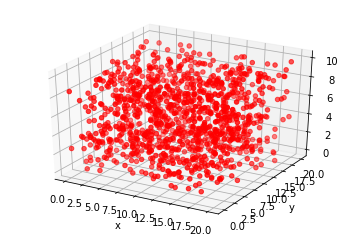

In [101]:
#Choose finite region of spacetime in which to sprinkle to be (x, y, t) = [0,L],[0,L],[0,L]
N_mean = 1000
N = int(np.random.normal(N_mean,0.1*N_mean))
L= 20
T = L*0.5
m = 0.1

xlist = [random.uniform(0,L) for i in range(N)]
ylist = [random.uniform(0,L) for i in range(N)]
tlist = [random.uniform(0,T) for i in range(N)]


ax = plt.axes(projection='3d')
ax.scatter(xlist,ylist,tlist,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



69


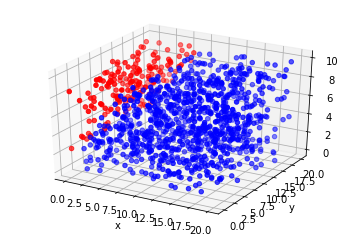

In [102]:
elements = zip(xlist,ylist,tlist)
def x(element):
    return element[0]
def y(element):
    return element[1]
def t(element):
    return element[2]
def dot_product(element,element2):
    return -1*(t(element)*t(element2))+(x(element)*x(element2))+(y(element)*y(element2))

#Basic algorithm
count = 0
x_values = []
y_values = []
for element in elements:
    #Find x
    if t(element) < x(element) + m*L:
        x_values.append(element)
        above_x = []
        for element2 in elements: #Find y, if timelike/null to x
            if dot_product(element,element2) <= 0:
                above_x.append(element2)
        #If there's only one element above x, and its above the horizon
        if len(above_x) == 1.0 and t(above_x[0]) > x(above_x[0]) - m*L:
            count +=1
    else:
        y_values.append(element)
print count            

ax = plt.axes(projection='3d')
ax.scatter([i[0] for i in x_values],[i[1] for i in x_values], [i[2] for i in x_values],color='b')
ax.scatter([i[0] for i in y_values],[i[1] for i in y_values], [i[2] for i in y_values],color='r')


plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Do it for simulations

In [104]:
N_repetitions = 100
N_mean = 100

count = []
for i in range(N_repetitions):
    counter = 0
    N = int(np.random.normal(N_mean,0.1*N_mean))
    xlist = [random.uniform(0,L) for i in range(N)]
    ylist = [random.uniform(0,L) for i in range(N)]
    tlist = [random.uniform(0,T) for i in range(N)]
    elements = zip(xlist,ylist,tlist)
    
    for element in elements:
        #Find x
        
        if t(element) < x(element) + m*L:
            above_x = []
            for element2 in elements: #Find y, if timelike/null to x
                if dot_product(element,element2) <= 0:
                    above_x.append(element2)
            #If there's only one element above x, and its above the horizon
            if len(above_x) == 1.0 and t(above_x[0]) > x(above_x[0]) - m*L:
                counter +=1
    count.append(counter)
    
#density = Nelements/volume

rho = float(N_mean)/(L*L*T)
l = (1./rho)**(1./3)
print "density", rho
print "discreteness length", l
print np.mean(count)*l, np.var(count)*l
print "Calculated value l<n> = ", np.mean(count)*l, "+/-", np.var(count)*l
print "Actual value of length = ", L
print "l<n>/Length = ", (np.mean(count)*1)/L

density 0.025
discreteness length 3.41995189335
54.1720379907 523.64388218
Calculated value l<n> =  54.1720379907 +/- 523.64388218
Actual value of length =  20
l<n>/Length =  0.792


## Behaviour with increasing density

In [ ]:
N_mean_list = np.linspace(1000,10000,10)

means = []
variances = []
for val in N_mean_list:
    print val
    N_mean = val
    #Main Algo
    N_repetitions = 10

    count = []
    for i in range(N_repetitions):
        counter = 0
        N = int(np.random.normal(N_mean,0.1*N_mean))
        xlist = [random.uniform(0,L) for i in range(N)]
        ylist = [random.uniform(0,L) for i in range(N)]
        tlist = [random.uniform(0,T) for i in range(N)]
        elements = zip(xlist,ylist,tlist)

        for element in elements:
            #Find x

            if t(element) < x(element) + m*L:
                above_x = []
                for element2 in elements: #Find y, if timelike/null to x
                    if dot_product(element,element2) <= 0:
                        above_x.append(element2)
                #If there's only one element above x, and its above the horizon
                if len(above_x) == 1.0 and t(above_x[0]) > x(above_x[0]) - m*L:
                    counter +=1
        count.append(counter)


    #Constant of predicted order(1) is real length/ (<n>*discreteness length)
    rho = float(N_mean)/(L*L*T)
    l = (1./rho)**(1./3)
    means.append((np.mean(count)*l)/float(L))
    print rho, np.mean(count),(np.mean(count)*l)/float(L)
    

plt.figure()
plt.errorbar(N_mean_list,means,label='simulation',color='b')
plt.plot(N_mean_list,[7.0 for i in range(len(N_mean_list))],'--',label='7.0 analytical',color='r')
plt.xlabel('<N> sprinkled')
plt.ylabel('l<n>/L')
plt.legend()
plt.savefig()
plt.show()

1000.0
